### Linear Regression

import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

read data of comprising of student's score vs. average amount of hours they have studies

In [6]:
df = pd.read_csv('data/Grade_Set_1.csv')

basic understanding of data

In [7]:
df.describe()

,Hours_Studied,Test_Grade
count,9.000000,9.000000
mean,6.000000,79.777778
std,2.738613,13.908431
min,2.000000,57.000000
25%,4.000000,73.000000
50%,6.000000,79.000000
75%,8.000000,90.000000
max,10.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  9 non-null      int64
 1   Test_Grade     9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


there are two categorical variables; hence let's perform a scatter plot to observe the correlation between variables

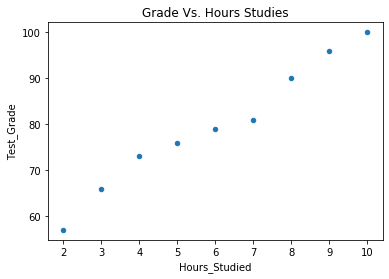

In [9]:
relationship = df.plot(kind='scatter', x='Hours_Studied', y = 'Test_Grade', title='Grade Vs. Hours Studies')

find correlation between the two

In [10]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


At this point it is evident that the two variables have high positive correlation and when one increases, the other increases too; therefore it can be concluded that they are correlated; however correlation does not indicate causation (who causes what)... however the reverse is true, as causation always manifests high correlation.

Variables might shows correlation because,
* small samples are prone to show higher correlation
* variables may be mutually influencing
* other variables beyond the correlated variables causes correlation

### Linear Regression using Scikit - Learn

If a line with equation y = mx + c can be drawn accorss the dots in the above graph, few points will belong to above the line and few below the line, the idea of simple linear regression is to find out a line such that square of distances for the points from the line (both taking positive and negative deviations) results into a minimum value.

In [19]:
# instantiate the model

model = LinearRegression()

x = df.Hours_Studied[:, np.newaxis] # independent variable
y = df.Test_Grade # dependent variable

# train the model
model.fit(x,y)
print("Intercept: ", model.intercept_) # indicates where the straight line cuts the Y axis
print("Coefficient: ", model.coef_) # indicates the slope

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


At this point, the model has learnt and yielded information that can be used to predict test grade for a given hour
Using y = mx + c equation and putting the variables obtained last following outcome can be obtained if a student studies 8 hours

In [21]:
maually_computed_test_grade = 5.01666667 * 8 + 49.67777777777776
print(maually_computed_test_grade)

89.81111113777777


So 89.81111113777777 is what came out as manually computed value

In [22]:
# predicting using built in function
model.predict([[8]])

array([89.81111111])

at this point we would plot predicted value of Y vs. X

Text(0.5, 0, 'Hours')

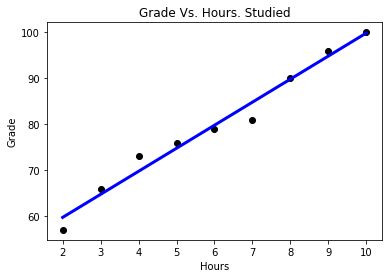

In [24]:
plt.scatter(x,y, color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.title('Grade Vs. Hours. Studied')
plt.ylabel('Grade')
plt.xlabel('Hours')

### How good is your model

There are 3 matrics widely used for evaluating linear regression model performance
* R-Squared (refer - https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition)
* RMSE
* MAE

R-Squared - frequently termed as determination of coefficient, this indicates how much percentage of Y is explained by independent variable X
Computed as - sum of square residual (SSR) / sum of square total (SST)
Where 
* SSR = sum of square of (Ypredicted - Ymean) for all Ypredicted
* SST = sum of square of (Yactual - Ymean) for all Yactual

RMSE - indicates the error between Ypredicted to Yactuals; lower the RMSE better is the model

MAE - Mean Absolute Error indicates mean or average of the absolute value of error



In [26]:
# TODO - Computation of the following